In [1]:
import os
import pandas as pd
import numpy as np

# The folder containing the CSV files
case_study_folder = "../InputDataset"  # Updated to the correct folder

# Reading each file 
df_accountbal = pd.read_csv(os.path.join(case_study_folder, "casestudy_accountbal.csv"))
df_demog = pd.read_csv(os.path.join(case_study_folder, "casestudy_demog.csv"))
df_inflow_outflow = pd.read_csv(os.path.join(case_study_folder, "casestudy_inflow_outflow.csv"))
df_target_rev = pd.read_csv(os.path.join(case_study_folder, "casestudy_target_rev.csv"))



In [73]:
print(df_accountbal.shape)
print(df_demog.shape)
print(df_inflow_outflow.shape)
print(df_target_rev.shape)

(1615, 13)
(1615, 4)
(1587, 15)
(969, 7)


In [74]:
# Perform left joins on the casestudy_demog DataFrame
merged_df = df_demog \
    .merge(df_accountbal, on="Client", how="left") \
    .merge(df_inflow_outflow, on="Client", how="left") \
    .merge(df_target_rev, on="Client", how="left")

# Display the resulting merged DataFrame
print("Merged DataFrame:")
print(merged_df.shape)

Merged DataFrame:
(1615, 36)


In [75]:
print(merged_df.dtypes)

Client                            int64
Sex                              object
Age                               int64
Tenure                            int64
Count_CA                          int64
Count_SA                        float64
Count_MF                        float64
Count_OVD                       float64
Count_CC                        float64
Count_CL                        float64
ActBal_CA                       float64
ActBal_SA                       float64
ActBal_MF                       float64
ActBal_OVD                      float64
ActBal_CC                       float64
ActBal_CL                       float64
VolumeCred                      float64
VolumeCred_CA                   float64
TransactionsCred                float64
TransactionsCred_CA             float64
VolumeDeb                       float64
VolumeDeb_CA                    float64
VolumeDebCash_Card              float64
VolumeDebCashless_Card          float64
VolumeDeb_PaymentOrder          float64


In [76]:

# Convert the Client column to string type
merged_df['Client'] = merged_df['Client'].astype(str)


## Understanding Data & Feature Engineering

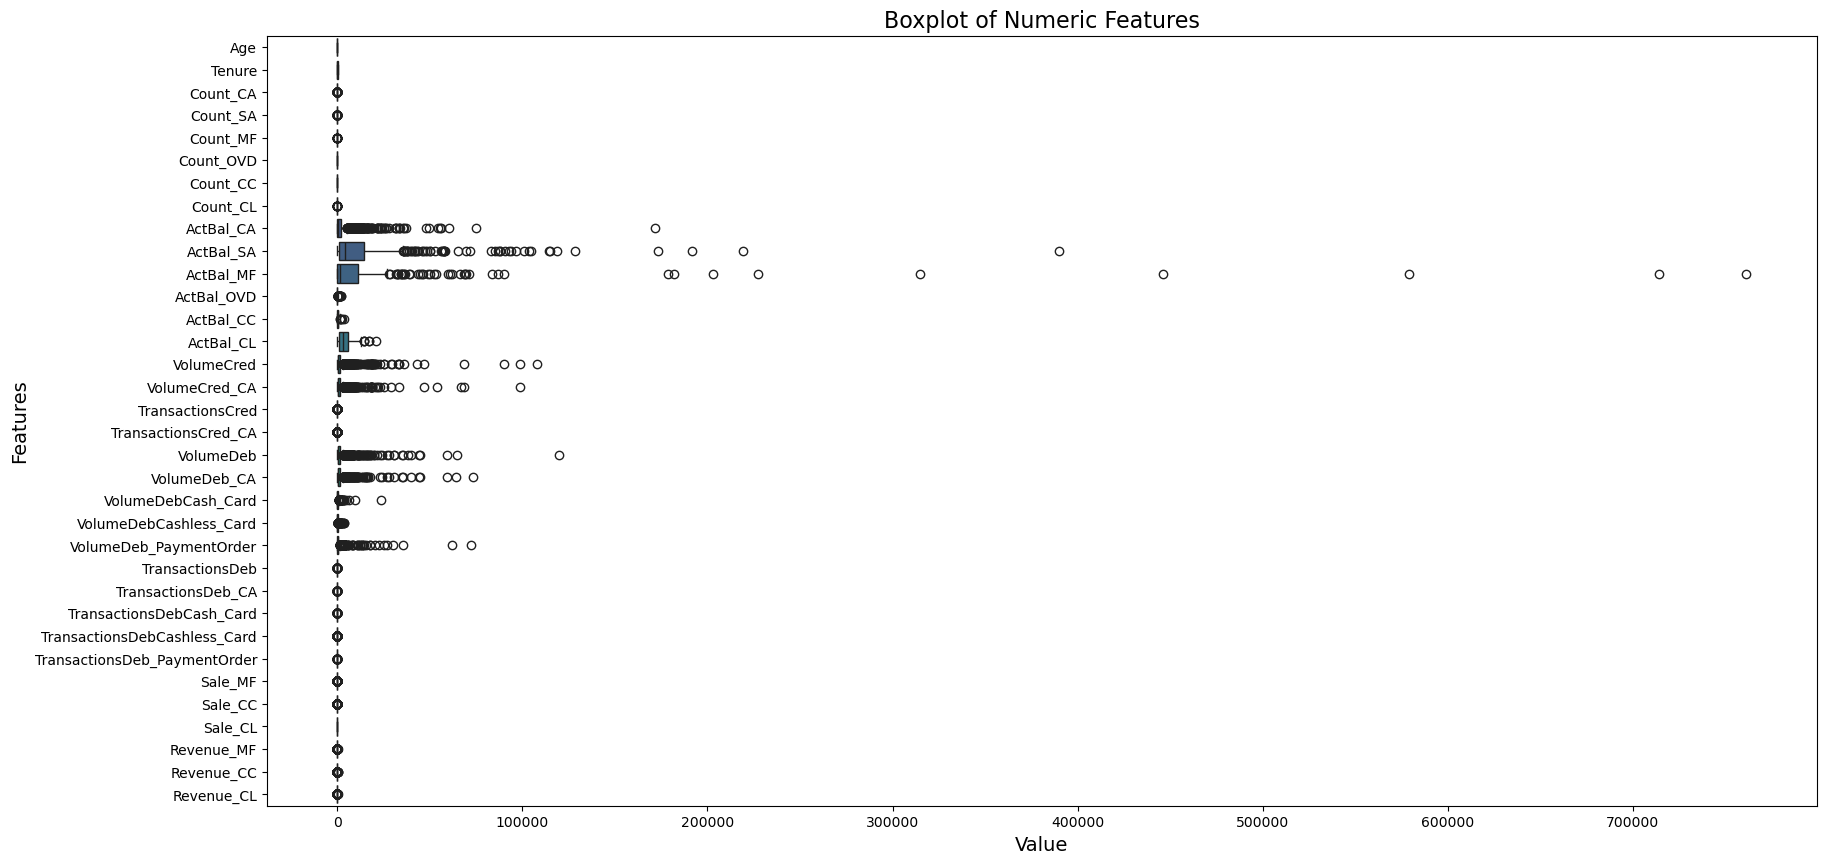

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = merged_df.select_dtypes(include=[np.number])

# Plot boxplots for each numeric feature
plt.figure(figsize=(20, 10))
sns.boxplot(data=numeric_features, orient='h', palette='viridis')
plt.title("Boxplot of Numeric Features", fontsize=16)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()

In [78]:

# Apply log transformation to reduce skewness
for col in ['ActBal_CA', 'ActBal_SA','ActBal_MF','ActBal_CC','ActBal_CL','ActBal_OVD','VolumeCred',
    'VolumeCred_CA',
    'TransactionsCred',
    'TransactionsCred_CA',
    'VolumeDeb',
    'VolumeDeb_CA',
    'VolumeDebCash_Card',
    'VolumeDebCashless_Card',
    'VolumeDeb_PaymentOrder',
    'TransactionsDeb',
    'TransactionsDeb_CA',
    'TransactionsDebCash_Card',
    'TransactionsDebCashless_Card',
    'TransactionsDeb_PaymentOrder']:
    merged_df[f'Log_{col}'] = np.log1p(merged_df[col])  # Use log1p to handle zero values

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


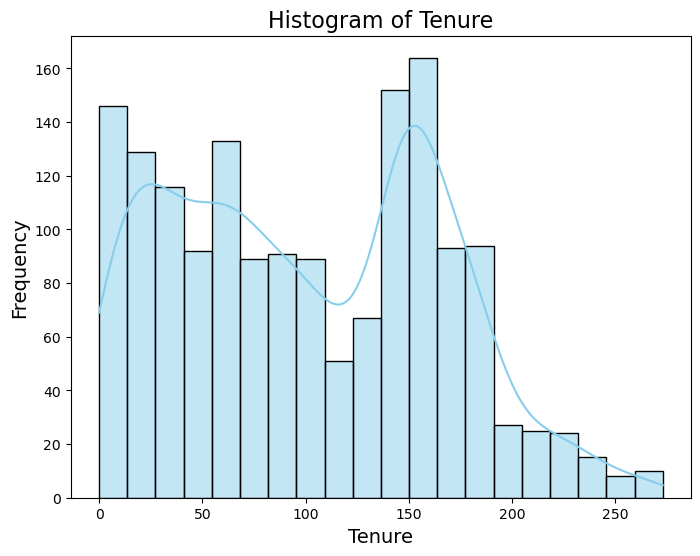

   Tenure   Tenure_Bin
0       7          Low
1     152         High
2     140  Medium-High
3     153         High
4     200         High
Tenure_Bin
Low            410
Medium-High    406
Medium-Low     402
High           397
Name: count, dtype: int64


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tenure Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=merged_df, x='Tenure', bins=20, kde=True, color='skyblue')
plt.title("Histogram of Tenure", fontsize=16)
plt.xlabel("Tenure", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()


# Percentile-based bins for Tenure
tenure_bins = [0, 0.25, 0.5, 0.75, 1]
tenure_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']


merged_df['Tenure_Bin'] = pd.qcut(merged_df['Tenure'], q=tenure_bins, labels=tenure_labels)


print(merged_df[['Tenure', 'Tenure_Bin']].head())
print(merged_df['Tenure_Bin'].value_counts())

In [80]:

# Aggregate total number of accounts
merged_df['Total_Accounts'] = merged_df[['Count_CA', 'Count_SA', 'Count_MF']].sum(axis=1)

# Computing ratios
merged_df['Cred_Deb_Ratio'] = merged_df['VolumeCred'] / merged_df['VolumeDeb']
merged_df['Trans_Cred_Deb_Ratio'] = merged_df['TransactionsCred'] / merged_df['TransactionsDeb']
merged_df['ActBal_CA_SA_Ratio'] = merged_df['ActBal_CA'] / merged_df['ActBal_SA']

# Create missing value indicators
merged_df['Count_SA_Missing'] = merged_df['Count_SA'].isnull().astype(int)
merged_df['Count_MF_Missing'] = merged_df['Count_MF'].isnull().astype(int)
merged_df['Count_CA_Missing'] = merged_df['Count_CA'].isnull().astype(int)
merged_df['VolumeCred_Missing'] = merged_df['VolumeCred'].isnull().astype(int)
merged_df['VolumeDeb_Missing'] = merged_df['VolumeDeb'].isnull().astype(int)
merged_df['ActBal_CA_Missing'] = merged_df['ActBal_CA'].isnull().astype(int)
merged_df['ActBal_SA_Missing'] = merged_df['ActBal_SA'].isnull().astype(int)
merged_df['ActBal_MF_Missing'] = merged_df['ActBal_MF'].isnull().astype(int)
merged_df['ActBal_CC_Missing'] = merged_df['ActBal_CC'].isnull().astype(int)
merged_df['ActBal_CL_Missing'] = merged_df['ActBal_CL'].isnull().astype(int)
merged_df['ActBal_OVD_Missing'] = merged_df['ActBal_OVD'].isnull().astype(int)

In [81]:
# Binning Age into categories
age_bins = [0, 25, 45, 65, np.inf]
age_labels = ['0-25', '25-45', '45-65', '65 & Above']
merged_df['Age_Bin'] = pd.cut(merged_df['Age'], bins=age_bins, labels=age_labels)

In [82]:
merged_df.columns

Index(['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF',
       'Count_OVD', 'Count_CC', 'Count_CL', 'ActBal_CA', 'ActBal_SA',
       'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred',
       'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb',
       'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder', 'Sale_MF', 'Sale_CC', 'Sale_CL',
       'Revenue_MF', 'Revenue_CC', 'Revenue_CL', 'Log_ActBal_CA',
       'Log_ActBal_SA', 'Log_ActBal_MF', 'Log_ActBal_CC', 'Log_ActBal_CL',
       'Log_ActBal_OVD', 'Log_VolumeCred', 'Log_VolumeCred_CA',
       'Log_TransactionsCred', 'Log_TransactionsCred_CA', 'Log_VolumeDeb',
       'Log_VolumeDeb_CA', 'Log_VolumeDebCash_Card',
       'Log_VolumeDebCashless_Card', 'Log_VolumeDeb_PaymentOrder',
       'Log_Tra

## Checking for Correlated Features

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

#Correlation matrix after removal of non-numeric features and also duplicate features whose log transformation is calculated
correlation_matrix = merged_df.drop(columns=['Client','Sex','Age_Bin','Tenure_Bin','ActBal_CA', 'ActBal_SA',
       'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred',
       'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb',
       'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder', 'Sale_MF', 'Sale_CC', 'Sale_CL',
       'Revenue_MF', 'Revenue_CC', 'Revenue_CL']).corr()

# Filter for correlations greater than 0.6 and less than -0.6
high_corr_pairs = correlation_matrix.unstack()  # Unstack the matrix to get pairs
high_corr_pairs = high_corr_pairs[(high_corr_pairs > 0.6) | (high_corr_pairs < -0.6)]  # Filter for high correlations

# Drop duplicate pairs (since correlation is symmetric)
high_corr_pairs = high_corr_pairs.drop_duplicates()

# Display the features with high correlation and their values
print("Features with high correlation:")
display(high_corr_pairs)

Features with high correlation:


Age                         Age                                 1.000000
Count_MF                    Total_Accounts                      0.995875
Log_VolumeCred              Log_VolumeCred_CA                   0.957218
                            Log_TransactionsCred                0.639138
                            Log_TransactionsCred_CA             0.634282
                            Log_VolumeDeb                       0.759958
                            Log_VolumeDeb_CA                    0.747382
                            Log_VolumeDeb_PaymentOrder          0.617023
                            Log_TransactionsDeb                 0.647996
                            Log_TransactionsDeb_CA              0.634800
Log_VolumeCred_CA           Log_TransactionsCred_CA             0.649703
                            Log_VolumeDeb                       0.761485
                            Log_VolumeDeb_CA                    0.761990
                            Log_VolumeDeb_PaymentOr

In [84]:
merged_df.columns

Index(['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF',
       'Count_OVD', 'Count_CC', 'Count_CL', 'ActBal_CA', 'ActBal_SA',
       'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred',
       'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb',
       'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder', 'Sale_MF', 'Sale_CC', 'Sale_CL',
       'Revenue_MF', 'Revenue_CC', 'Revenue_CL', 'Log_ActBal_CA',
       'Log_ActBal_SA', 'Log_ActBal_MF', 'Log_ActBal_CC', 'Log_ActBal_CL',
       'Log_ActBal_OVD', 'Log_VolumeCred', 'Log_VolumeCred_CA',
       'Log_TransactionsCred', 'Log_TransactionsCred_CA', 'Log_VolumeDeb',
       'Log_VolumeDeb_CA', 'Log_VolumeDebCash_Card',
       'Log_VolumeDebCashless_Card', 'Log_VolumeDeb_PaymentOrder',
       'Log_Tra

In [85]:
import pandas as pd

import numpy as np

# Convert categorical columns to numeric using one-hot encoding


cols_to_dummy = ['Sex','Age_Bin','Tenure_Bin']
merged_df = pd.get_dummies(merged_df,columns=cols_to_dummy ,drop_first=True)

numeric_features=merged_df.drop(columns=['Client','ActBal_CA', 'ActBal_SA',
       'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred',
       'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb',
       'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder', 'Sale_MF', 'Sale_CC', 'Sale_CL',
       'Revenue_MF', 'Revenue_CC', 'Revenue_CL','Age','Tenure'])
# Replace `inf` and `-inf` with `NaN`
numeric_features.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle `NaN` values (e.g., fill with median)
numeric_features = numeric_features.fillna(0)

numeric_features.dtypes
# Convert all boolean columns to integers
bool_columns = numeric_features.select_dtypes(include=['bool']).columns
numeric_features[bool_columns] = numeric_features[bool_columns].astype(int)

# Update the numeric features in merged_df
merged_df[numeric_features.columns] = numeric_features

# Verify the conversion
numeric_features.dtypes

Count_CA                              int64
Count_SA                            float64
Count_MF                            float64
Count_OVD                           float64
Count_CC                            float64
Count_CL                            float64
Log_ActBal_CA                       float64
Log_ActBal_SA                       float64
Log_ActBal_MF                       float64
Log_ActBal_CC                       float64
Log_ActBal_CL                       float64
Log_ActBal_OVD                      float64
Log_VolumeCred                      float64
Log_VolumeCred_CA                   float64
Log_TransactionsCred                float64
Log_TransactionsCred_CA             float64
Log_VolumeDeb                       float64
Log_VolumeDeb_CA                    float64
Log_VolumeDebCash_Card              float64
Log_VolumeDebCashless_Card          float64
Log_VolumeDeb_PaymentOrder          float64
Log_TransactionsDeb                 float64
Log_TransactionsDeb_CA          

## Removal of Features with high VIF to remove multicollinearity

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF for each feature
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Iteratively remove features with high VIF
threshold = 10  # VIF threshold
while True:
    vif = calculate_vif(numeric_features)
    max_vif = vif['VIF'].max()
    if max_vif > threshold:
        # Drop the feature with the highest VIF
        feature_to_drop = vif.loc[vif['VIF'].idxmax(), 'Feature']
        print(f"Dropping feature '{feature_to_drop}' with VIF: {max_vif}")
        numeric_features = numeric_features.drop(columns=[feature_to_drop])
    else:
        break

# Remaining features after removing multicollinear features
print("Remaining features after VIF filtering:")
print(numeric_features.columns)

# Select categorical features
categorical_features = merged_df.select_dtypes(include=['object', 'category']).columns

# Combine numeric features (after VIF filtering) and categorical features
remaining_features = list(numeric_features.columns) +list(['Client','Sale_MF', 'Sale_CC', 'Sale_CL',
       'Revenue_MF', 'Revenue_CC', 'Revenue_CL'])

# Update merged_df to keep only the remaining features
merged_df = merged_df[remaining_features]

# Display the updated DataFrame's columns
print("Columns in merged_df after retaining numeric and categorical features:")
print(merged_df.columns)





/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature 'Count_CA' with VIF: inf


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping feature 'Count_OVD' with VIF: inf


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping feature 'Count_SA_Missing' with VIF: inf


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping feature 'Count_MF_Missing' with VIF: inf


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature 'VolumeCred_Missing' with VIF: inf


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping feature 'ActBal_CC_Missing' with VIF: 535.7947090774429
Dropping feature 'Log_VolumeDeb' with VIF: 412.2817171092083


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping feature 'Log_TransactionsDeb' with VIF: 306.5940046333632
Dropping feature 'Total_Accounts' with VIF: 192.24801584807324


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping feature 'Log_VolumeCred' with VIF: 129.52048383410101
Dropping feature 'Log_TransactionsCred' with VIF: 97.1280368730282


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping feature 'Log_TransactionsDeb_CA' with VIF: 92.45155322208541
Dropping feature 'ActBal_CL_Missing' with VIF: 73.20998167013104


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping feature 'Log_VolumeDeb_CA' with VIF: 30.583318423556626
Dropping feature 'ActBal_SA_Missing' with VIF: 19.51031587083357


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping feature 'Log_VolumeDeb_PaymentOrder' with VIF: 18.115150606753843
Dropping feature 'Log_VolumeDebCashless_Card' with VIF: 16.551183187737028


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping feature 'Log_TransactionsCred_CA' with VIF: 15.376232743093539
Dropping feature 'Log_VolumeDebCash_Card' with VIF: 10.675423980657596
Remaining features after VIF filtering:
Index(['Count_SA', 'Count_MF', 'Count_CC', 'Count_CL', 'Log_ActBal_CA',
       'Log_ActBal_SA', 'Log_ActBal_MF', 'Log_ActBal_CC', 'Log_ActBal_CL',
       'Log_ActBal_OVD', 'Log_VolumeCred_CA', 'Log_TransactionsDebCash_Card',
       'Log_TransactionsDebCashless_Card', 'Log_TransactionsDeb_PaymentOrder',
       'Cred_Deb_Ratio', 'Trans_Cred_Deb_Ratio', 'ActBal_CA_SA_Ratio',
       'Count_CA_Missing', 'VolumeDeb_Missing', 'ActBal_CA_Missing',
       'ActBal_MF_Missing', 'ActBal_OVD_Missing', 'Sex_M', 'Age_Bin_25-45',
       'Age_Bin_45-65', 'Age_Bin_65 & Above', 'Tenure_Bin_Medium-Low',
       'Tenure_Bin_Medium-High', 'Tenure_Bin_High'],
      dtype='object')
Columns in merged_df after retaining numeric and categorical features:
Index(['Count_SA', 'Count_MF', 'Count_CC', 'Count_CL', 'Log_ActBal_CA',
       '

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [87]:
merged_df.dtypes

Count_SA                            float64
Count_MF                            float64
Count_CC                            float64
Count_CL                            float64
Log_ActBal_CA                       float64
Log_ActBal_SA                       float64
Log_ActBal_MF                       float64
Log_ActBal_CC                       float64
Log_ActBal_CL                       float64
Log_ActBal_OVD                      float64
Log_VolumeCred_CA                   float64
Log_TransactionsDebCash_Card        float64
Log_TransactionsDebCashless_Card    float64
Log_TransactionsDeb_PaymentOrder    float64
Cred_Deb_Ratio                      float64
Trans_Cred_Deb_Ratio                float64
ActBal_CA_SA_Ratio                  float64
Count_CA_Missing                      int64
VolumeDeb_Missing                     int64
ActBal_CA_Missing                     int64
ActBal_MF_Missing                     int64
ActBal_OVD_Missing                    int64
Sex_M                           

## Preparing 3 separate Datasets for Mutual Funds, Consumer Loan and Credit Card Models

In [88]:

df_without_revenue_salesMF = merged_df.drop(columns=['Sale_CC', 'Sale_CL','Revenue_CC', 'Revenue_CL'])
df_without_revenue_salesCC = merged_df.drop(columns=['Sale_MF', 'Sale_CL','Revenue_MF', 'Revenue_CL'])    
df_without_revenue_salesCL = merged_df.drop(columns=['Sale_MF', 'Sale_CC','Revenue_MF', 'Revenue_CC'])

In [89]:
df_without_revenue_salesMF.head()

,Count_SA,Count_MF,Count_CC,Count_CL,Log_ActBal_CA,Log_ActBal_SA,Log_ActBal_MF,Log_ActBal_CC,Log_ActBal_CL,Log_ActBal_OVD,...,Sex_M,Age_Bin_25-45,Age_Bin_45-65,Age_Bin_65 & Above,Tenure_Bin_Medium-Low,Tenure_Bin_Medium-High,Tenure_Bin_High,Client,Sale_MF,Revenue_MF
0,0.0,0.0,0.0,0.0,7.196539,0.000000,0.00000,0.000000,0.0,0.0,...,0,0,1,0,0,0,0,1,1.0,26.972679
1,1.0,0.0,0.0,0.0,4.716430,9.497562,0.00000,0.000000,0.0,0.0,...,1,1,0,0,0,0,1,2,0.0,0.000000
2,0.0,1.0,0.0,0.0,6.181371,0.000000,4.68446,0.000000,0.0,0.0,...,1,0,0,0,0,1,0,3,NaN,NaN
3,1.0,0.0,1.0,0.0,7.378284,4.349467,0.00000,7.013359,0.0,0.0,...,1,0,0,0,0,0,1,4,NaN,NaN
4,1.0,0.0,0.0,0.0,8.585690,8.997236,0.00000,0.000000,0.0,0.0,...,0,0,1,0,0,0,1,5,NaN,NaN


In [90]:
#Writing the Processed Dataframe to CSV
df_without_revenue_salesMF.to_csv(os.path.join(case_study_folder, "processed_data_salesMF.csv"), index=False)
df_without_revenue_salesCC.to_csv(os.path.join(case_study_folder, "processed_data_salesCC.csv"), index=False)
df_without_revenue_salesCL.to_csv(os.path.join(case_study_folder, "processed_data_salesCL.csv"), index=False)